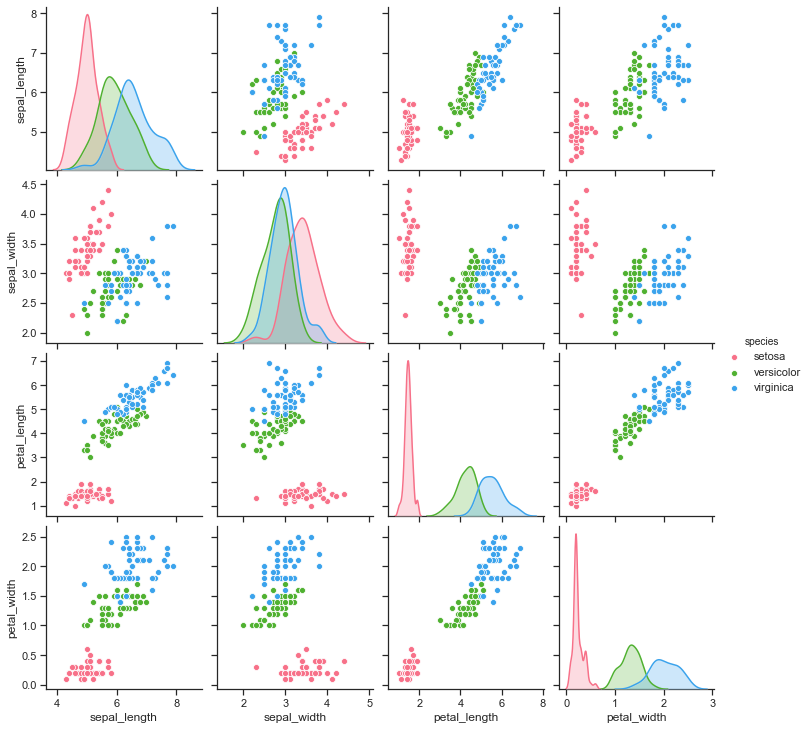

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style = "ticks", color_codes = True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue = "species", palette = "husl")


In [7]:
iris.info()
iris['species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

print(Y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                   test_size=0.2,
                                                   random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64, input_shape=(4,), activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', 
             optimizer = 'Adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [11]:
hist = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100)


Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 3ms/step - loss: 0.9355 - accuracy: 0.6417 - val_loss: 0.8980 - val_accuracy: 0.5667
Epoch 2/100
120/120 [==============================] - 0s 126us/step - loss: 0.8254 - accuracy: 0.6917 - val_loss: 0.8615 - val_accuracy: 0.5667
Epoch 3/100
120/120 [==============================] - 0s 151us/step - loss: 0.7502 - accuracy: 0.6917 - val_loss: 0.7890 - val_accuracy: 0.5667
Epoch 4/100
120/120 [==============================] - 0s 133us/step - loss: 0.6904 - accuracy: 0.6917 - val_loss: 0.7223 - val_accuracy: 0.6000
Epoch 5/100
120/120 [==============================] - 0s 124us/step - loss: 0.6424 - accuracy: 0.7083 - val_loss: 0.6699 - val_accuracy: 0.6333
Epoch 6/100
120/120 [==============================] - 0s 141us/step - loss: 0.5974 - accuracy: 0.8167 - val_loss: 0.6283 - val_accuracy: 0.6667
Epoch 7/100
120/120 [==============================] - 0s 137us/step - loss: 0.5571 - 

Epoch 56/100
120/120 [==============================] - 0s 116us/step - loss: 0.0965 - accuracy: 0.9833 - val_loss: 0.1384 - val_accuracy: 0.9667
Epoch 57/100
120/120 [==============================] - 0s 116us/step - loss: 0.0938 - accuracy: 0.9750 - val_loss: 0.1413 - val_accuracy: 0.9667
Epoch 58/100
120/120 [==============================] - 0s 108us/step - loss: 0.0944 - accuracy: 0.9750 - val_loss: 0.1383 - val_accuracy: 0.9667
Epoch 59/100
120/120 [==============================] - 0s 91us/step - loss: 0.0907 - accuracy: 0.9833 - val_loss: 0.1262 - val_accuracy: 0.9667
Epoch 60/100
120/120 [==============================] - 0s 100us/step - loss: 0.0944 - accuracy: 0.9833 - val_loss: 0.1256 - val_accuracy: 0.9667
Epoch 61/100
120/120 [==============================] - 0s 91us/step - loss: 0.0908 - accuracy: 0.9833 - val_loss: 0.1274 - val_accuracy: 0.9667
Epoch 62/100
120/120 [==============================] - 0s 99us/step - loss: 0.0909 - accuracy: 0.9833 - val_loss: 0.1276 - va

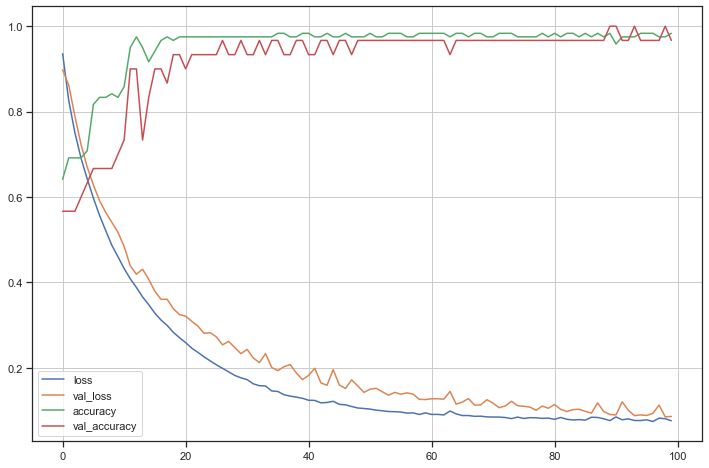

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()